In [2]:
# Import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats
import conorm

In [3]:
# FUNCTIONS: 

# define a function that transforms the sample names to coherent condition names
def sample_to_condition(sample: str) -> str:
    """Transform individual sample name to coherent condition name."""
    if sample.startswith('N'):
        return 'Normoxia'
    elif sample.startswith('A'):
        return 'Anoxia'
    elif sample.startswith('R'):
        return 'Reoxygenation'
    else: 
        raise ValueError(f"Unknown sample name {sample}")

# 1 Import DElncRNA and DESeq data 

In [4]:
# read in DElncRNA data with the lowest padj and the higherst log2FoldCHange 
identifiers = [
    "strg.2136.1",
    "strg.53453.1",
    "strg.38565.1",
    "strg.11981.1",
    "strg.60521.10",
    "STRG.5325.3",
    "STRG.64857.3",
    "STRG.23078.2",
    "STRG.5325.3",
    "STRG.16826.2"
]

# Create a DataFrame from the list
lncrna = pd.DataFrame(identifiers, columns=['lncrna'])
lncrna['lncrna'] = lncrna['lncrna'].str.upper()
# Print the DataFrame
print(lncrna)


          lncrna
0    STRG.2136.1
1   STRG.53453.1
2   STRG.38565.1
3   STRG.11981.1
4  STRG.60521.10
5    STRG.5325.3
6   STRG.64857.3
7   STRG.23078.2
8    STRG.5325.3
9   STRG.16826.2


In [5]:

# Import DEseq results
# IMPORT raw data 
deg_na = pd.read_csv('comp_anoxia_normoxia.csv', header=0, sep=',').assign(condition='NvsA')
deg_nr = pd.read_csv('comp_reoxygenation_normoxia.csv', header=0, sep=',').assign(condition='NvsR')
deg_ar = pd.read_csv('comp_anoxia_reoxygenation.csv', header=0, sep=',').assign(condition='AvsR')
deg = pd.concat([deg_na, deg_nr, deg_ar])
deg.rename({'Unnamed: 0': 'transcript_id'},axis=1,  inplace=True)
deg.set_index('transcript_id', inplace=True)


In [6]:
deg

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,condition
transcript_id,,,,,,,
STRG.2.1,2.153152,2.345862,0.971524,2.025016,0.042866,0.150399,NvsA
STRG.3.1,1.333318,0.527247,0.971577,0.153087,0.878330,1.000000,NvsA
STRG.4.1,3.869676,-0.165478,0.568838,0.000000,1.000000,1.000000,NvsA
STRG.7.1,0.720848,-0.010295,1.350803,0.000000,1.000000,NaN,NvsA
STRG.11.1,27.072431,0.262793,0.224295,0.000000,1.000000,1.000000,NvsA
...,...,...,...,...,...,...,...
STRG.89495.1,422251.510644,0.472386,0.193157,0.485999,0.626968,1.000000,AvsR
STRG.89496.1,86935.452267,0.381898,0.224370,0.015092,0.987958,1.000000,AvsR
STRG.89497.1,48988.191172,1.020031,0.413133,1.552817,0.120467,0.705417,AvsR


In [7]:
deg[deg.index.isin(lncrna['lncrna'])]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,condition
transcript_id,,,,,,,
STRG.2136.1,1398.348549,3.751644,0.095973,35.146631,1.308649e-270,2.832747e-267,NvsA
STRG.5325.3,38.278819,1.562799,0.270904,4.371619,1.233289e-05,7.713894e-05,NvsA
STRG.11981.1,443.029644,2.959613,0.107993,23.900703,3.011613e-126,1.279438e-123,NvsA
STRG.16826.2,33.217203,1.207937,0.213174,3.890838,9.989860e-05,5.568060e-04,NvsA
STRG.23078.2,402.897054,0.342290,0.086894,0.000000,1.000000e+00,1.000000e+00,NvsA
STRG.38565.1,744.240427,3.293680,0.118916,24.514550,1.033488e-132,4.859959e-130,NvsA
STRG.53453.1,466.568518,-6.182445,0.204906,-28.324791,1.711389e-176,1.303830e-173,NvsA
STRG.60521.10,235.242630,3.289650,0.137940,21.104353,7.254029e-99,1.808494e-96,NvsA
STRG.64857.3,62.048776,0.780489,0.144625,2.779444,5.445196e-03,2.329858e-02,NvsA


# 2 Import feature counts data

In [8]:
# import fetaure cpounts (gene expression data)
expression = pd.read_csv('../8_create_count_matrix/gene_matrix_count.csv', sep=',', index_col=0)
# reorder the columns of the expression dataframes
# Specify the desired column order
column_order = ['N14', 'N15', 'N16', 'N17', 'N18', 'N21', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13']
# Reorder the dataframe columns
expression = expression.reindex(columns=column_order)
# filter the rows that have as a sum less than 50 counts
expression = expression[(expression.sum(axis=1) >= 50)]
# data normlization to get TMM data 
expression_tmm = conorm.tmm(expression)

In [9]:
expression_tmm

,N14,N15,N16,N17,N18,N21,A1,A2,A3,A4,A5,A6,R8,R9,R10,R11,R12,R13
Geneid,,,,,,,,,,,,,,,,,,
STRG.4.1,0.976519,1.966774,5.718192,5.806125,5.847396,5.023024,4.203867,2.071713,2.110546,8.237449,1.042832,6.203532,3.937948,1.959313,3.930746,1.951437,3.984486,5.889833
STRG.11.1,17.577334,14.750808,20.013672,30.965999,22.415019,27.124327,21.019336,23.824703,23.216002,40.157566,23.985143,35.153350,39.379480,32.328661,31.445971,32.198711,26.895280,31.412444
STRG.11.2,17.577334,14.750808,20.013672,30.965999,22.415019,27.124327,21.019336,23.824703,23.216002,40.157566,23.985143,35.153350,39.379480,32.328661,31.445971,32.198711,26.895280,31.412444
STRG.11.3,17.577334,14.750808,20.013672,30.965999,22.415019,27.124327,21.019336,23.824703,23.216002,40.157566,23.985143,35.153350,39.379480,32.328661,31.445971,32.198711,26.895280,31.412444
STRG.14.1,90.816226,81.621138,87.678944,86.124186,91.609207,116.534147,89.332179,103.585663,104.472011,130.769510,103.240396,88.917297,112.231518,97.965639,87.459108,120.989097,112.561729,94.237331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STRG.89493.1,100.581412,91.455010,103.880488,38.707499,135.464679,105.483495,44.140606,50.756975,43.266186,50.454378,38.584794,39.289038,57.100246,90.128387,75.666869,58.543111,88.654813,48.100304
STRG.89495.1,371266.498348,417291.507457,461268.439767,358340.480744,420150.035122,613968.192232,538196.953248,432248.471013,281736.742757,289713.155741,276421.467711,302661.038053,584567.706177,461215.368717,354833.392836,443641.649561,528508.196262,526790.604743
STRG.89496.1,75561.053328,89009.325553,100494.365028,77851.425622,85436.305809,135446.835799,123300.477745,88777.056886,58340.758946,54681.218983,57957.489818,59995.395278,109788.021229,87840.889809,65192.412075,90242.254773,113949.325993,101716.437103


In [10]:
# filter expression df for top three DElncRNA
tmm_lnc = expression_tmm[expression_tmm.index.isin(lncrna['lncrna'])]
# reset index 
tmm_lnc.reset_index(inplace=True)

In [11]:
tmm_lnc

,Geneid,N14,N15,N16,N17,N18,N21,A1,A2,A3,A4,A5,A6,R8,R9,R10,R11,R12,R13
0,STRG.2136.1,206.045417,286.165675,157.250280,183.860622,212.455395,221.013038,2960.573519,3020.557942,3096.170512,2978.867649,2767.676880,2918.761971,1308.383223,1148.157284,1280.440647,1054.751724,896.509344,1054.280136
1,STRG.5325.3,14.647778,16.717582,19.060640,11.612250,19.491321,14.064466,51.497374,38.326695,41.155641,41.187247,33.370633,88.917297,57.100246,34.287973,43.238211,53.664519,74.709112,46.137026
2,STRG.11981.1,83.980596,81.621138,67.665272,62.899686,102.329433,103.474286,684.179397,623.585693,724.972441,725.925231,636.127693,653.438741,562.142077,770.009919,538.512260,587.382551,562.808644,556.589234
3,STRG.16826.2,19.530371,29.501616,17.154576,12.579937,17.542189,17.078280,34.681905,42.470122,46.432005,58.691827,49.013117,42.390804,36.426019,41.145568,46.186270,30.247274,24.903037,43.192110
4,STRG.23078.2,272.448679,236.012928,240.164063,207.085121,234.870414,316.450486,346.819049,307.649420,320.802943,412.902153,270.093561,334.990747,598.568096,715.149161,675.105698,595.188299,598.669018,663.587870
5,STRG.38565.1,98.628375,134.724046,172.498792,135.476247,163.727093,150.690708,1302.147884,1521.673394,1363.412509,1772.081308,1324.397000,1494.017374,916.557397,676.942562,757.651373,616.654107,666.405279,473.149931
6,STRG.53453.1,1173.775312,1432.795149,930.159229,938.656858,1520.323011,915.194899,12.611602,10.358566,23.216002,13.385855,26.070807,13.440987,242.183802,155.765365,248.619711,220.512386,217.154486,254.244465
7,STRG.60521.10,29.295557,25.568067,29.543992,32.901374,24.364151,45.207212,311.086177,268.286868,321.858216,359.358731,336.834828,308.108773,351.461859,466.316440,379.317030,308.327053,377.530046,343.573601
8,STRG.64857.3,34.178150,36.385326,43.839472,33.869062,53.601132,55.253260,68.312843,76.653391,73.869099,83.404175,74.041092,82.713765,60.053707,80.331824,70.753436,78.057482,62.755654,65.769804


In [12]:
# convert from long to short format
tmm_lnc = tmm_lnc.melt(id_vars='Geneid', var_name='sample', value_name='measurement')
# write uniform sample name for each condition 
tmm_lnc['condition'] = tmm_lnc['sample'].apply(sample_to_condition)
tmm_lnc

,Geneid,sample,measurement,condition
0,STRG.2136.1,N14,206.045417,Normoxia
1,STRG.5325.3,N14,14.647778,Normoxia
2,STRG.11981.1,N14,83.980596,Normoxia
3,STRG.16826.2,N14,19.530371,Normoxia
4,STRG.23078.2,N14,272.448679,Normoxia
...,...,...,...,...
157,STRG.23078.2,R13,663.587870,Reoxygenation
158,STRG.38565.1,R13,473.149931,Reoxygenation
159,STRG.53453.1,R13,254.244465,Reoxygenation
160,STRG.60521.10,R13,343.573601,Reoxygenation


# 3 Normalization of data

In [13]:
grouped = tmm_lnc.groupby(['Geneid'])

tmm_norm = []

for gene_id, data in grouped: 
    # calculate the mean for normoxia
    mean = data.loc[data.condition == 'Normoxia', 'measurement']
    if len(mean) == 0: 
        continue
    mean = mean.mean() 
    # calculate the geomean in normoxia 
    geomean = stats.gmean(data.loc[data.condition == 'Normoxia', 'measurement'])
    # write the calculated mean into a new column
    data["norm_average"] = mean
    # Determination of relative deviation
    data["rel_deviation"] = data["measurement"]/mean
    tmm_norm.append(data)
tmm_norm = pd.concat(tmm_norm)
tmm_norm

,Geneid,sample,measurement,condition,norm_average,rel_deviation
2,STRG.11981.1,N14,83.980596,Normoxia,83.661735,1.003811
11,STRG.11981.1,N15,81.621138,Normoxia,83.661735,0.975609
20,STRG.11981.1,N16,67.665272,Normoxia,83.661735,0.808796
29,STRG.11981.1,N17,62.899686,Normoxia,83.661735,0.751833
38,STRG.11981.1,N18,102.329433,Normoxia,83.661735,1.223133
...,...,...,...,...,...,...
125,STRG.64857.3,R9,80.331824,Reoxygenation,42.854400,1.874529
134,STRG.64857.3,R10,70.753436,Reoxygenation,42.854400,1.651019
143,STRG.64857.3,R11,78.057482,Reoxygenation,42.854400,1.821458
152,STRG.64857.3,R12,62.755654,Reoxygenation,42.854400,1.464392


# Significance test 

In [14]:
from scipy.stats import f_oneway
from scipy.stats import alexandergovern

# test if expression changes are significant 
def stats_test(data: pd.DataFrame):
    grouped = data.groupby('Geneid')
    anova_results = pd.DataFrame(columns=['F', 'p'])
    for geneid, data in grouped: 
        if data['rel_deviation'].isna().all(): 
            continue
        samples=[]
        std_dev=[]
        for _, sample in data.groupby('condition'):
            samples.append(sample['rel_deviation'])
            std_dev.append(sample['rel_deviation'].std())
        if np.all(np.isclose(std_dev, np.mean(std_dev), rtol=0.5)):
            test='anova'
            res = f_oneway(*samples)
        else:
            test= 'alexander-govern'
            res = alexandergovern(*samples)
        F,p = res.statistic, res.pvalue
        anova_results.loc[geneid, 'F'] = F
        anova_results.loc[geneid, 'p'] = p
        anova_results.loc[geneid, 'Test'] = test
    return anova_results

In [15]:
# apply the defines significance test onto the dataframe 
stat_res = stats_test(tmm_norm)
stat_res

,F,p,Test
STRG.11981.1,55.949427,0.0,alexander-govern
STRG.16826.2,20.509081,0.000051,anova
STRG.2136.1,63.697513,0.0,alexander-govern
STRG.23078.2,121.076611,0.0,anova
STRG.38565.1,38.657735,0.0,alexander-govern
STRG.5325.3,17.908637,0.000129,alexander-govern
STRG.53453.1,35.197019,0.0,alexander-govern
STRG.60521.10,49.94801,0.0,alexander-govern
STRG.64857.3,29.163562,0.000007,anova


In [16]:
from scipy.stats import tukey_hsd
from scipy.stats import mannwhitneyu

# perform post-hoc test 
def posthoc_test(data: pd.DataFrame): 
    grouped = data.groupby('Geneid')
    posthoc_results = pd.DataFrame(index=data['Geneid'].unique())
    for geneid, data in grouped: 
        if data['rel_deviation'].isna().all(): 
            continue
        samples=[]
        groups = list(data.groupby('condition').groups.keys())
        names = []
        for i in groups: 
            for j in groups: 
                names.append('p ' + i+j)
        for name, sample in data.groupby(['condition']):
            samples.append(sample['rel_deviation'])
        test = 'tukey_hsd'
        res = tukey_hsd(*samples)
        posthoc_results.loc[geneid,names] = res.pvalue.flatten()
    return posthoc_results


In [17]:
post_res = posthoc_test(tmm_norm)
post_res.drop(columns=['p AnoxiaAnoxia', 'p ReoxygenationReoxygenation', 'p NormoxiaNormoxia', 'p AnoxiaNormoxia', 'p ReoxygenationNormoxia', 'p ReoxygenationNormoxia', 'p ReoxygenationAnoxia'], inplace=True)
post_res

,p AnoxiaReoxygenation,p NormoxiaAnoxia,p NormoxiaReoxygenation
STRG.11981.1,7.419546e-02,4.271583e-11,3.261647e-10
STRG.16826.2,1.418977e-01,4.201363e-05,1.882399e-03
STRG.2136.1,6.150636e-14,0.000000e+00,1.466466e-09
STRG.23078.2,1.795091e-08,2.023698e-02,7.125037e-10
STRG.38565.1,1.254668e-07,8.458167e-11,1.148168e-05
STRG.5325.3,9.532920e-01,3.149349e-03,1.749657e-03
STRG.53453.1,9.144137e-02,7.281319e-09,1.092683e-07
STRG.60521.10,5.096240e-02,1.708620e-09,1.524165e-10
STRG.64857.3,3.288850e-01,8.321645e-06,1.073528e-04


# 5 PLOT (Barplot)

/tmp/ipykernel_13996/1009269451.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


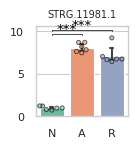

/tmp/ipykernel_13996/1009269451.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])


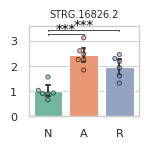

/tmp/ipykernel_13996/1009269451.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


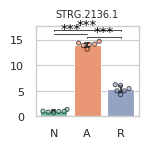

/tmp/ipykernel_13996/1009269451.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])


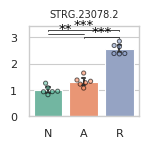

/tmp/ipykernel_13996/1009269451.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


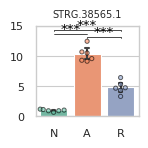

/tmp/ipykernel_13996/1009269451.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])


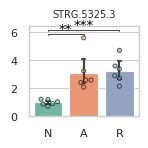

/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_13996/1009269451.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


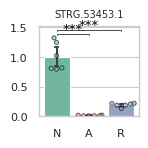

/tmp/ipykernel_13996/1009269451.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])
/home/maggy/anaconda3/envs/methylscore/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


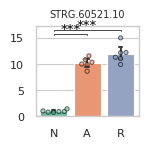

/tmp/ipykernel_13996/1009269451.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['N', 'A', 'R'])


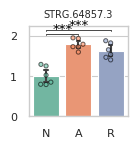

In [18]:
# define sig list 
sig_list = {'p AnoxiaReoxygenation': (1,2),
            'p NormoxiaAnoxia': (0,1),
            'p NormoxiaReoxygenation': (0,2)}

def sig_cat(s):
    if s < 0.0027:
        return "***"
    if s < 0.0455:
        return "**"
    
# set sns colorpallete to colorblind 
sns.set_theme(palette='Set2', style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})

for geneid, data in tmm_norm.groupby('Geneid'): 
    if np.any(stat_res.loc[geneid, 'Test'] == ''):
        continue
    # PLOT
    plt.figure(figsize=(4/2.54, 4/2.54))
    g = sns.barplot(data=data, x='condition', y='rel_deviation', capsize=0.1, err_kws={"linewidth": 1.5}, hue='condition', legend=False)
    sns.swarmplot(data=data, x='condition', y='rel_deviation', size=3, ax=g, 
                  dodge=False, legend=False, linewidth=0.7, edgecolor="k", alpha=0.6, hue='condition')
    g.set_xticklabels(['N', 'A', 'R'])
    # significance bars 
    x_pos = np.array([p.get_x() for p in g.patches])
    x_width = np.array([p.get_width() for p in g.patches])
    x_pos = x_pos + (x_width/2)
    y, h, col = data['rel_deviation'].max() * 1.04, data['rel_deviation'].max() * 0.01, 'k'
    offset=0
    sig_info = post_res.loc[geneid, sig_list.keys()]
    sig_info = sig_info.loc[sig_info <= 0.05]
    for name, value in sig_info.items():
        height= np.array([y, y+h, y+h, y]) + offset
        x1, x2 = x_pos[list(sig_list[name])]
        plt.plot([x1, x1, x2, x2], height, lw=0.5, c=col)
        plt.text((x1 + x2) * .5, y + h + offset - (data['rel_deviation'].max() * 0.015), sig_cat(value), ha='center', va='bottom', color=col)
        offset += data['rel_deviation'].max() * 0.05  
    plt.title(geneid, fontdict={'weight': 'regular'}, fontsize=7)
    #plt.ylim(top=1.6)
    plt.ylabel('')
    plt.xlabel('')

    plt.tight_layout()
    plt.savefig(f'DELncRNA_expression_top10/{geneid}.svg')
    plt.show()
    plt.close()

